In [1]:
#importing libararies
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## **Analyse about the data set**

In [2]:
#reading the data set
Train_Data = pd.read_csv("Olenzro_bank.csv")
Train_Data.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1,2009,01/08/2009,1102011,0.5,RENT,1,Low,85000,1,...,11.89,21,B,2,19.48,29324.32,25000.00,0.00,829.10,ulster
1,2,2008,01/07/2008,1032010,0.5,RENT,1,Low,30000,1,...,16.08,43,F,6,23.84,1207.76,999.99,0.00,35.20,cannught
2,3,2008,01/05/2008,1062011,0.5,RENT,1,Low,65000,1,...,10.71,20,B,2,14.29,8215.45,7000.00,0.00,228.22,Northern-Irl
3,4,2008,01/04/2008,1102008,10.0,MORTGAGE,3,Medium,189500,2,...,16.08,55,F,6,22.47,1231.90,783.46,0.25,246.38,ulster
4,5,2014,01/08/2014,1122014,1.0,RENT,1,Low,70000,1,...,16.99,18,D,4,10.50,6073.10,1634.65,3354.94,891.20,Northern-Irl


In [3]:
Train_Data.tail()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
113275,113276,2015,01/12/2015,1012016,0.5,RENT,1,Low,56000,1,...,16.55,58,D,4,25.11,0.0,0.0,0.0,531.44,cannught
113276,113277,2015,01/12/2015,1012016,7.0,MORTGAGE,3,Medium,101000,2,...,16.99,53,D,4,22.66,0.0,0.0,0.0,596.34,leinster
113277,113278,2015,01/12/2015,1012016,4.0,MORTGAGE,3,Low,98000,1,...,12.59,27,C,3,17.32,0.0,0.0,0.0,80.40,ulster
113278,113279,2015,01/12/2015,1012016,3.0,MORTGAGE,3,Low,61900,1,...,15.41,21,D,4,20.32,0.0,0.0,0.0,209.20,Northern-Irl
113279,113280,2015,01/12/2015,1012016,6.0,RENT,1,Medium,150000,2,...,21.99,87,F,6,19.21,0.0,0.0,0.0,773.18,Northern-Irl


In [4]:
Train_Data.shape

(113280, 31)

In [5]:
#cheking  data types of the coulmn
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113280 entries, 0 to 113279
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113280 non-null  int64  
 1   year                  113280 non-null  int64  
 2   issue_d               113280 non-null  object 
 3   final_d               113280 non-null  int64  
 4   emp_length_int        113280 non-null  float64
 5   home_ownership        113280 non-null  object 
 6   home_ownership_cat    113280 non-null  int64  
 7   income_category       113280 non-null  object 
 8   annual_inc            113280 non-null  int64  
 9   income_cat            113280 non-null  int64  
 10  loan_amount           113280 non-null  int64  
 11  term                  113280 non-null  object 
 12  term_cat              113280 non-null  int64  
 13  application_type      113280 non-null  object 
 14  application_type_cat  113280 non-null  int64  
 15  

In [6]:
#cheking the available columns in the data set
Train_Data.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'age', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_1532\231503113.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_Data.corr() , annot=True)


<Axes: >

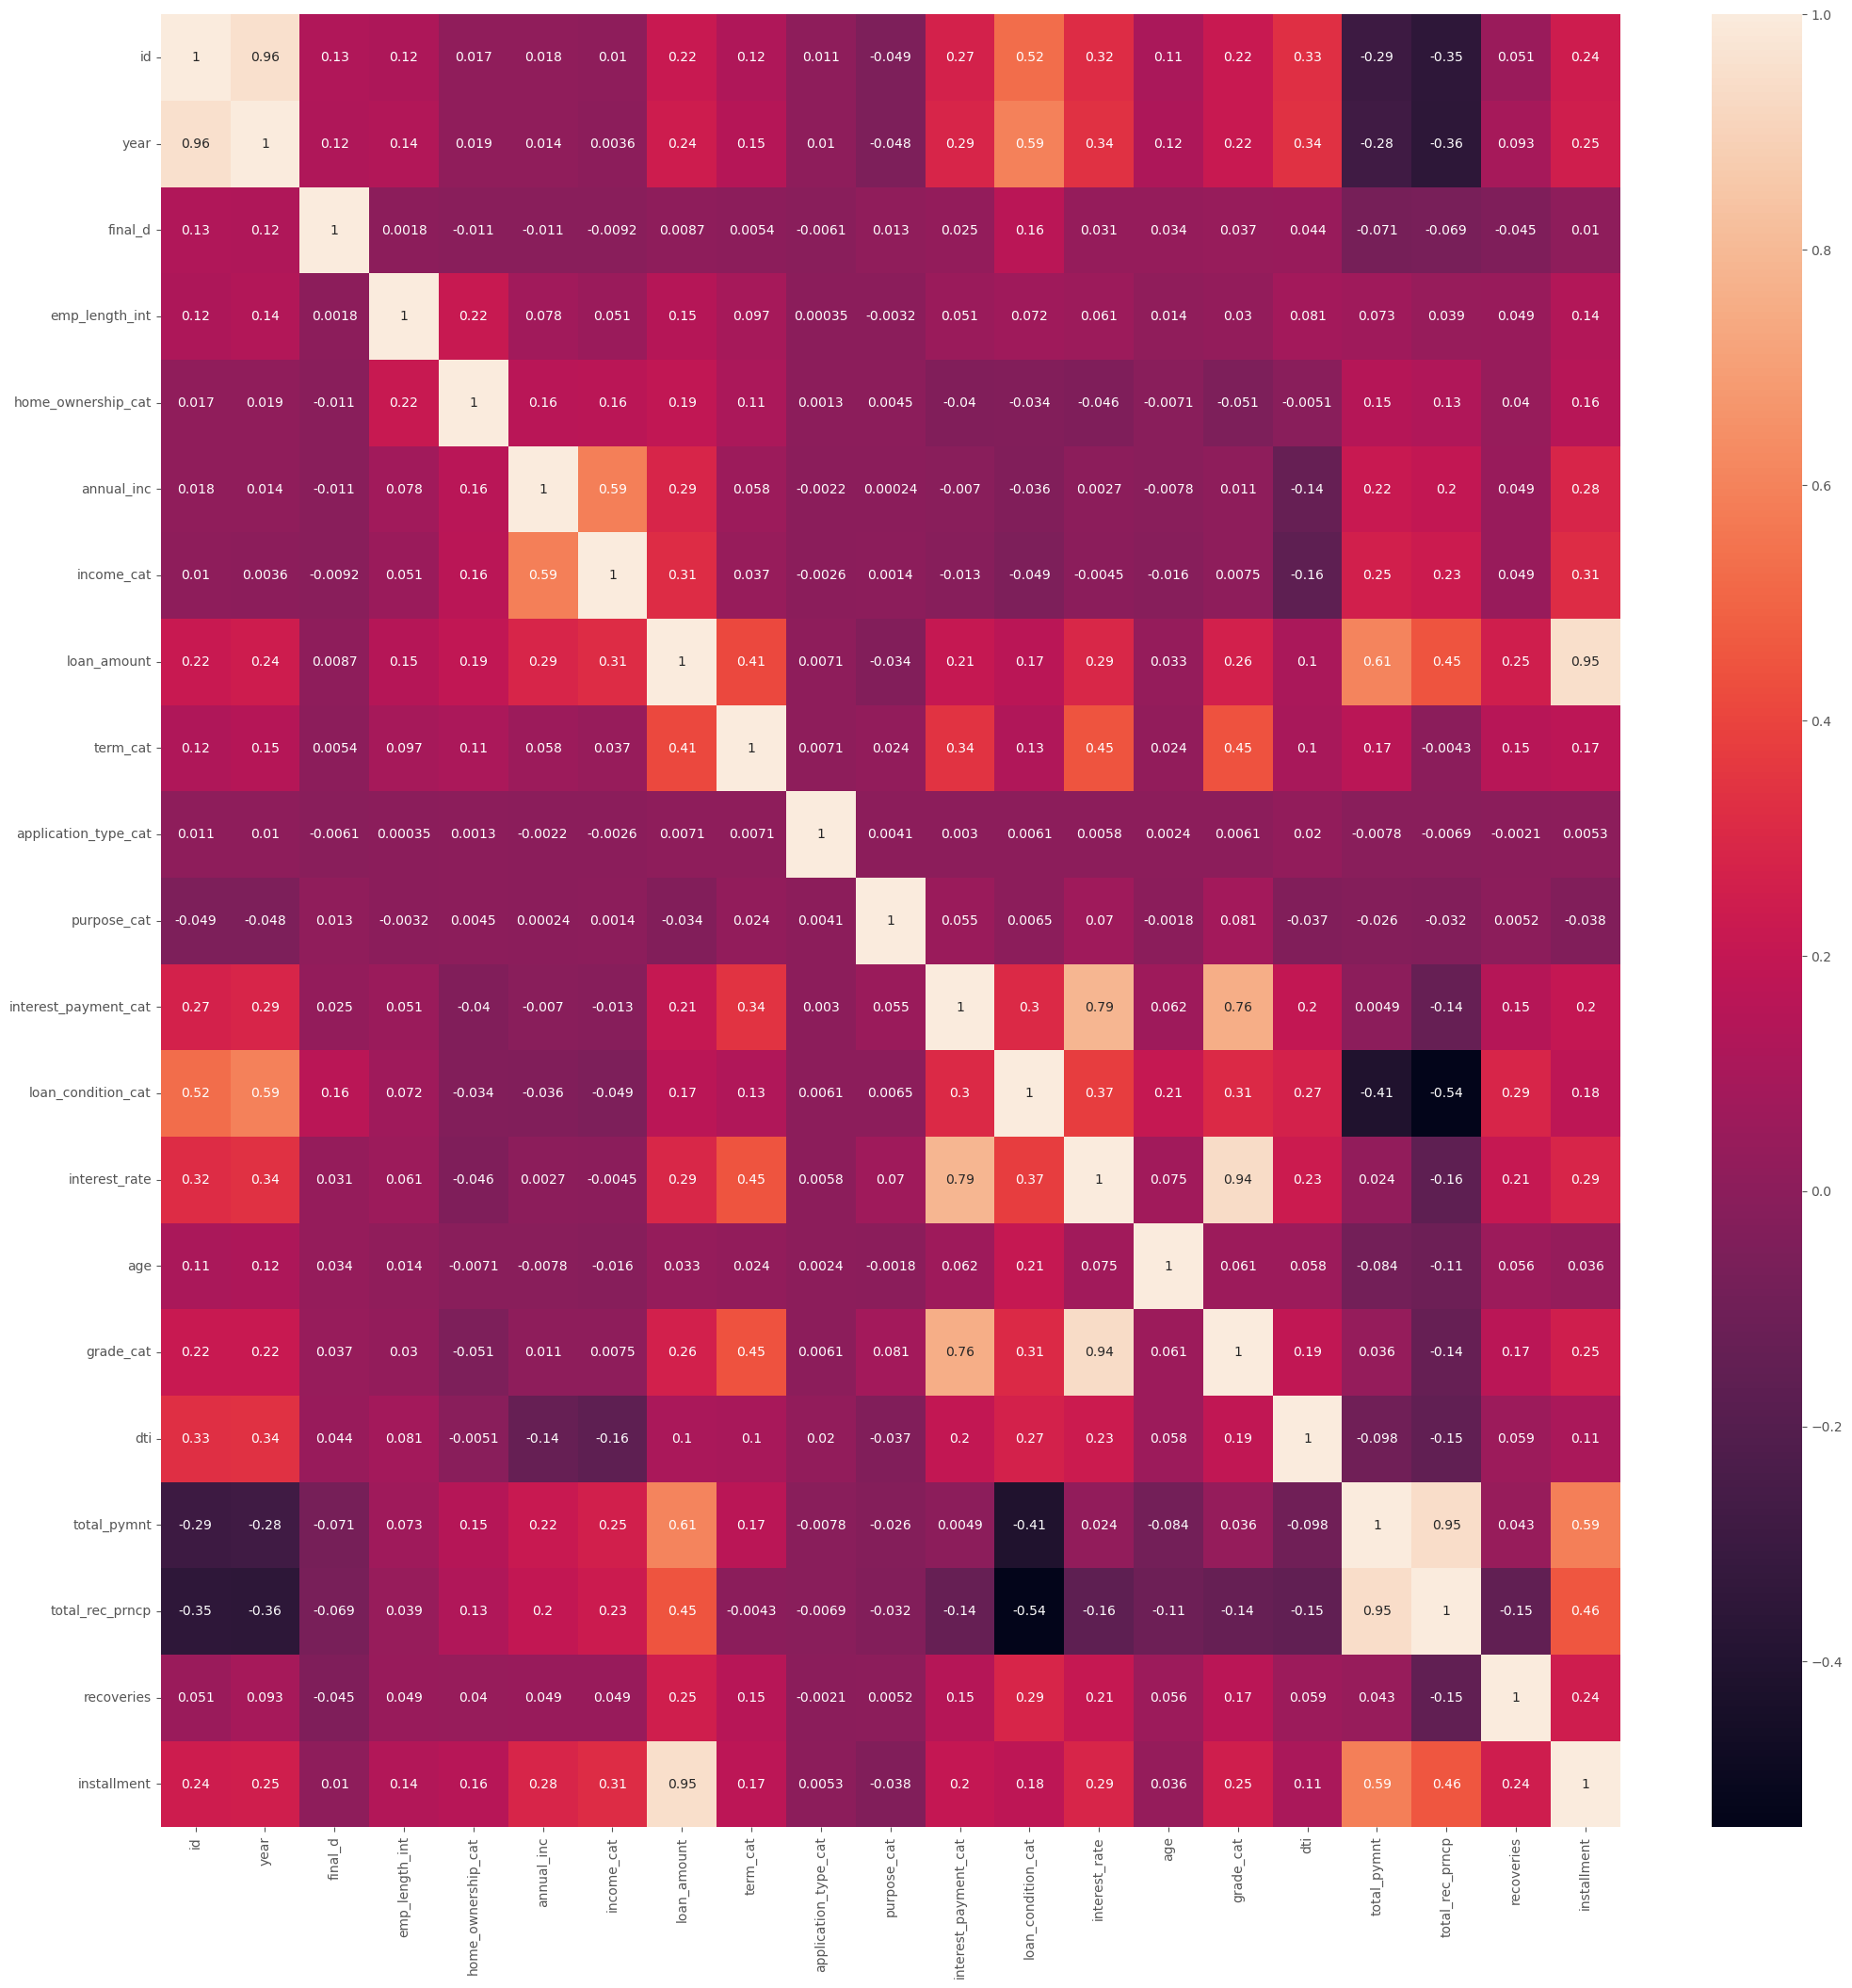

In [7]:
plt.figure(figsize=(25,25))
sns.heatmap(Train_Data.corr() , annot=True)

In [8]:
# Numeric Variables's statistical summary
Train_Data.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,...,interest_payment_cat,loan_condition_cat,interest_rate,age,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,113280.000000,113280.000000,1.132800e+05,113280.000000,113280.000000,1.132800e+05,113280.000000,113280.000000,113280.000000,113280.000000,...,113280.000000,113280.000000,113272.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000
mean,56640.500000,2012.246204,1.069539e+06,5.626671,2.007760,6.947177e+04,1.156647,13579.070886,1.304944,1.000044,...,1.579952,0.544703,14.362952,47.578964,3.075980,16.787528,9395.249278,6735.842002,330.392153,408.286032
std,32701.263584,1.818962,3.846970e+04,3.491567,0.957921,6.438527e+04,0.400955,8285.573758,0.460386,0.006644,...,0.493568,0.498000,4.515381,20.206136,1.435671,8.045788,7928.634304,6413.635522,1059.828025,245.104487
min,1.000000,2007.000000,1.012008e+06,0.500000,1.000000,1.896000e+03,1.000000,500.000000,1.000000,1.000000,...,1.000000,0.000000,5.320000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,28320.750000,2011.000000,1.032015e+06,2.000000,1.000000,4.200000e+04,1.000000,7100.000000,1.000000,1.000000,...,1.000000,0.000000,11.120000,30.000000,2.000000,10.810000,3584.020000,2000.000000,0.000000,227.410000
50%,56640.500000,2013.000000,1.072014e+06,6.000000,2.000000,6.000000e+04,1.000000,12000.000000,1.000000,1.000000,...,2.000000,1.000000,14.090000,47.000000,3.000000,16.580000,7166.635000,4800.000000,0.000000,354.450000
75%,84960.250000,2014.000000,1.102015e+06,10.000000,3.000000,8.300000e+04,1.000000,18825.000000,2.000000,1.000000,...,2.000000,1.000000,17.390000,63.000000,4.000000,22.380000,12862.712500,9646.820000,0.000000,537.950000
max,113280.000000,2015.000000,1.122015e+06,10.000000,5.000000,8.900060e+06,3.000000,35000.000000,2.000000,2.000000,...,2.000000,1.000000,28.990000,90.000000,7.000000,59.260000,56809.051630,35000.030000,33520.270000,1424.570000


# **DATA PREPROCESSING**

---



## **Identify null values**

In [9]:
#check null values of the trainin gdata set

Train_Data.isnull()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
Train_Data.isnull().sum().sort_values(ascending=False)

interest_rate           8
id                      0
purpose_cat             0
installment             0
recoveries              0
total_rec_prncp         0
total_pymnt             0
dti                     0
grade_cat               0
grade                   0
age                     0
loan_condition_cat      0
loan_condition          0
interest_payment_cat    0
interest_payments       0
purpose                 0
year                    0
application_type_cat    0
application_type        0
term_cat                0
term                    0
loan_amount             0
income_cat              0
annual_inc              0
income_category         0
home_ownership_cat      0
home_ownership          0
emp_length_int          0
final_d                 0
issue_d                 0
region                  0
dtype: int64

## **Handling numerical missing data**

In [11]:
# handle numerical missing data
Train_Data['interest_rate'] = Train_Data['interest_rate'].fillna(Train_Data['interest_rate'].mean())

In [12]:
# cheking whether the null values replaced or not
Train_Data.isnull().sum().sort_values(ascending=False)

id                      0
purpose_cat             0
installment             0
recoveries              0
total_rec_prncp         0
total_pymnt             0
dti                     0
grade_cat               0
grade                   0
age                     0
interest_rate           0
loan_condition_cat      0
loan_condition          0
interest_payment_cat    0
interest_payments       0
purpose                 0
year                    0
application_type_cat    0
application_type        0
term_cat                0
term                    0
loan_amount             0
income_cat              0
annual_inc              0
income_category         0
home_ownership_cat      0
home_ownership          0
emp_length_int          0
final_d                 0
issue_d                 0
region                  0
dtype: int64

In [13]:
#check duplicate values of the trainin gdata set


# Count of duplicate records persent in the data

duplicateRows = Train_Data[Train_Data.duplicated()]
print("Number of duplicate rows:",duplicateRows.shape)

Number of duplicate rows: (0, 31)


## **Adding meaningful attribute values to maintain the consistency**

In [14]:
Train_Data.loc[Train_Data['term'] == '36 months', 'term'] = 36
Train_Data.loc[Train_Data['term'] == '60 months', 'term'] = 60
Train_Data.loc[Train_Data['home_ownership'] == 'MORTGAGE', 'home_ownership'] = 'Mortgage'
Train_Data.loc[Train_Data['home_ownership'] == 'ANY', 'home_ownership'] = 'Any'
Train_Data.loc[Train_Data['home_ownership'] == 'RENT', 'home_ownership'] = 'Rent'
Train_Data.loc[Train_Data['home_ownership'] == 'OWN', 'home_ownership'] = 'Own'
Train_Data.loc[Train_Data['home_ownership'] == 'NONE', 'home_ownership'] = 'None'
Train_Data.loc[Train_Data['home_ownership'] == 'OTHER', 'home_ownership'] = 'Other'
Train_Data.loc[Train_Data['application_type'] == 'INDIVIDUAL', 'application_type'] = 'Individual'
Train_Data.loc[Train_Data['application_type'] == 'JOINT', 'application_type'] = 'Joint'
Train_Data.loc[Train_Data['purpose'] == 'credit_card', 'purpose'] = 'Credit Card'
Train_Data.loc[Train_Data['purpose'] == 'debt_consolidation', 'purpose'] = 'Debt consolidation'
Train_Data.loc[Train_Data['purpose'] == 'renewable_energy', 'purpose'] = 'Renewable energy'
Train_Data.loc[Train_Data['purpose'] == 'major_purchase', 'purpose'] = 'Major Purchase'
Train_Data.loc[Train_Data['purpose'] == 'small_business', 'purpose'] = 'Small Business'
Train_Data.loc[Train_Data['purpose'] == 'home_improvment', 'purpose'] = 'Home Improvment'
Train_Data.loc[Train_Data['purpose'] == 'car', 'purpose'] = 'Car'
Train_Data.loc[Train_Data['purpose'] == 'educational', 'purpose'] = 'Educational'
Train_Data.loc[Train_Data['purpose'] == 'house', 'purpose'] = 'House'
Train_Data.loc[Train_Data['purpose'] == 'medical', 'purpose'] = 'Medical'
Train_Data.loc[Train_Data['purpose'] == 'moving', 'purpose'] = 'Moving'
Train_Data.loc[Train_Data['purpose'] == 'other', 'purpose'] = 'Other'
Train_Data.loc[Train_Data['purpose'] == 'vacation', 'purpose'] = 'Vacation'
Train_Data.loc[Train_Data['purpose'] == 'wedding', 'purpose'] = 'Wedding'
Train_Data

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1,2009,01/08/2009,1102011,0.5,Rent,1,Low,85000,1,...,11.89,21,B,2,19.48,29324.32,25000.00,0.00,829.10,ulster
1,2,2008,01/07/2008,1032010,0.5,Rent,1,Low,30000,1,...,16.08,43,F,6,23.84,1207.76,999.99,0.00,35.20,cannught
2,3,2008,01/05/2008,1062011,0.5,Rent,1,Low,65000,1,...,10.71,20,B,2,14.29,8215.45,7000.00,0.00,228.22,Northern-Irl
3,4,2008,01/04/2008,1102008,10.0,Mortgage,3,Medium,189500,2,...,16.08,55,F,6,22.47,1231.90,783.46,0.25,246.38,ulster
4,5,2014,01/08/2014,1122014,1.0,Rent,1,Low,70000,1,...,16.99,18,D,4,10.50,6073.10,1634.65,3354.94,891.20,Northern-Irl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,113276,2015,01/12/2015,1012016,0.5,Rent,1,Low,56000,1,...,16.55,58,D,4,25.11,0.00,0.00,0.00,531.44,cannught
113276,113277,2015,01/12/2015,1012016,7.0,Mortgage,3,Medium,101000,2,...,16.99,53,D,4,22.66,0.00,0.00,0.00,596.34,leinster
113277,113278,2015,01/12/2015,1012016,4.0,Mortgage,3,Low,98000,1,...,12.59,27,C,3,17.32,0.00,0.00,0.00,80.40,ulster
113278,113279,2015,01/12/2015,1012016,3.0,Mortgage,3,Low,61900,1,...,15.41,21,D,4,20.32,0.00,0.00,0.00,209.20,Northern-Irl


In [15]:
#drop column which are not related
Train_Data = Train_Data.drop(columns=['id',
'year',
'issue_d',
'final_d',
'home_ownership_cat',
'income_cat',
'term_cat',
'application_type_cat',                            
'purpose_cat',                           
'interest_payment_cat',
'loan_condition_cat',
'grade_cat',
'total_rec_prncp',
'recoveries',
'region'],axis=1)

Train_Data

,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_payments,loan_condition,interest_rate,age,grade,dti,total_pymnt,installment
0,0.5,Rent,Low,85000,25000,36 months,Individual,Debt consolidation,Low,Good Loan,11.89,21,B,19.48,29324.32,829.10
1,0.5,Rent,Low,30000,1000,36 months,Individual,Debt consolidation,High,Good Loan,16.08,43,F,23.84,1207.76,35.20
2,0.5,Rent,Low,65000,7000,36 months,Individual,Credit Card,Low,Good Loan,10.71,20,B,14.29,8215.45,228.22
3,10.0,Mortgage,Medium,189500,7000,36 months,Individual,Debt consolidation,High,Bad Loan,16.08,55,F,22.47,1231.90,246.38
4,1.0,Rent,Low,70000,25000,36 months,Individual,Debt consolidation,High,Bad Loan,16.99,18,D,10.50,6073.10,891.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,0.5,Rent,Low,56000,15000,36 months,Individual,Debt consolidation,High,Bad Loan,16.55,58,D,25.11,0.00,531.44
113276,7.0,Mortgage,Medium,101000,24000,60 months,Individual,Debt consolidation,High,Bad Loan,16.99,53,D,22.66,0.00,596.34
113277,4.0,Mortgage,Low,98000,2400,36 months,Individual,Other,Low,Bad Loan,12.59,27,C,17.32,0.00,80.40
113278,3.0,Mortgage,Low,61900,6000,36 months,Individual,Vacation,High,Bad Loan,15.41,21,D,20.32,0.00,209.20


# **DATA VISUALIZATION**

---



## **Exloratory data anlysis**

In [16]:
#setting a value for indentify good loan and bad loan with a function
def defaulted(x):
    if x == 'Good Loan':
        return 0
    else:
        return 1

In [17]:
Train_Data['loan_cat'] = Train_Data['loan_condition'].apply(lambda x: defaulted(x))

<Axes: title={'center': 'Home ownership vs Loan Condition'}, xlabel='home_ownership', ylabel='count'>

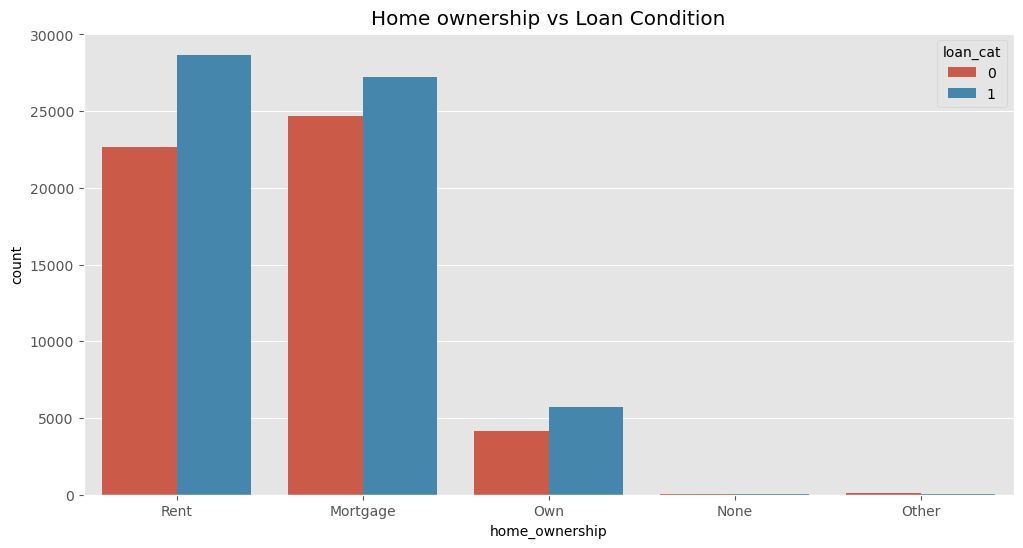

In [18]:
plt.figure(figsize=(12,6))
plt.title("Home ownership vs Loan Condition")
sns.countplot(x='home_ownership',data=Train_Data, hue='loan_cat')

<Axes: title={'center': 'Income Category vs Loan Condition'}, xlabel='income_category', ylabel='count'>

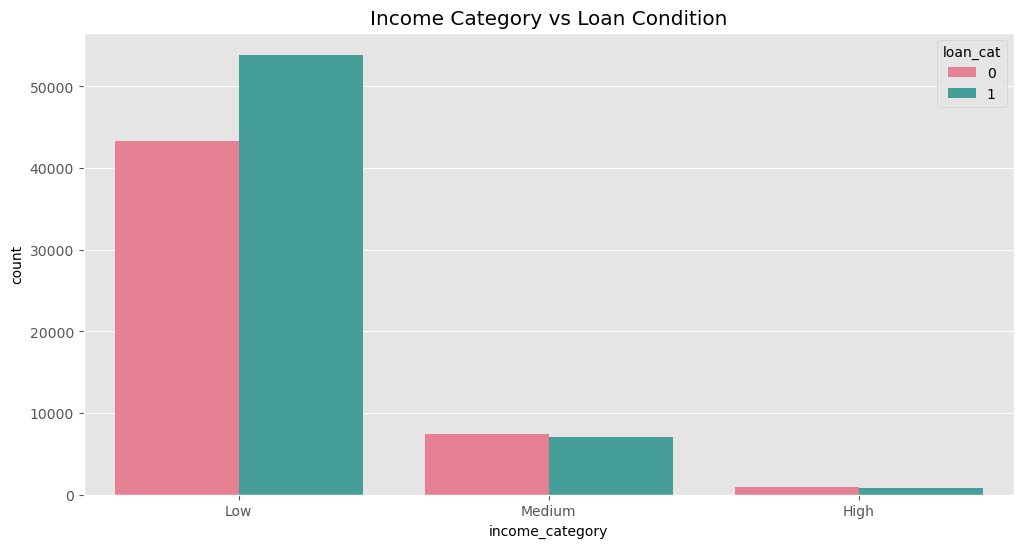

In [19]:
plt.figure(figsize=(12,6))
plt.title("Income Category vs Loan Condition")
sns.countplot(x='income_category',data=Train_Data, hue='loan_cat',palette="husl")

<Axes: title={'center': 'Term vs Loan Condition'}, xlabel='term', ylabel='count'>

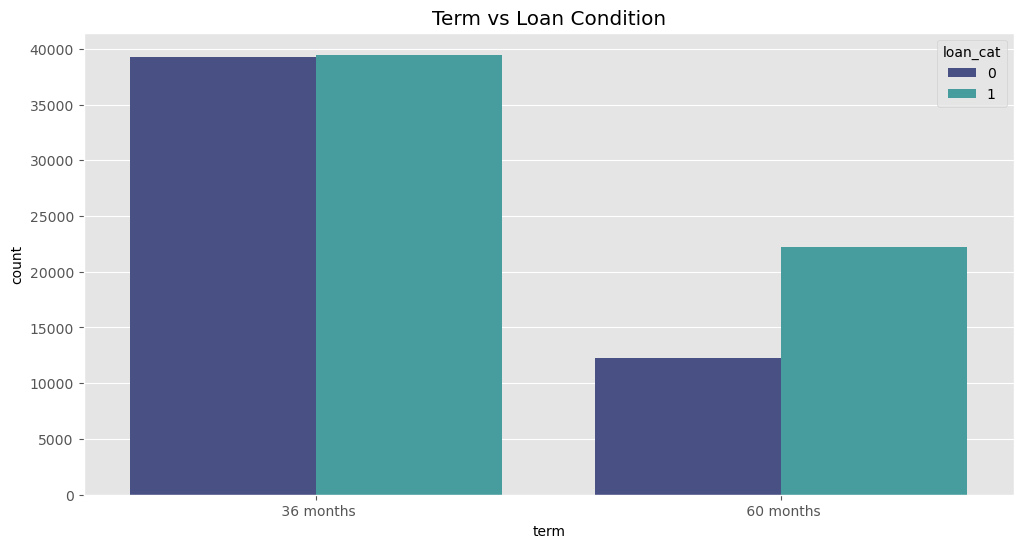

In [20]:
plt.figure(figsize=(12,6))
plt.title("Term vs Loan Condition")
sns.countplot(x='term',data=Train_Data, hue='loan_cat',palette="mako")

<Axes: title={'center': 'Application Type vs Loan Condition'}, xlabel='application_type', ylabel='count'>

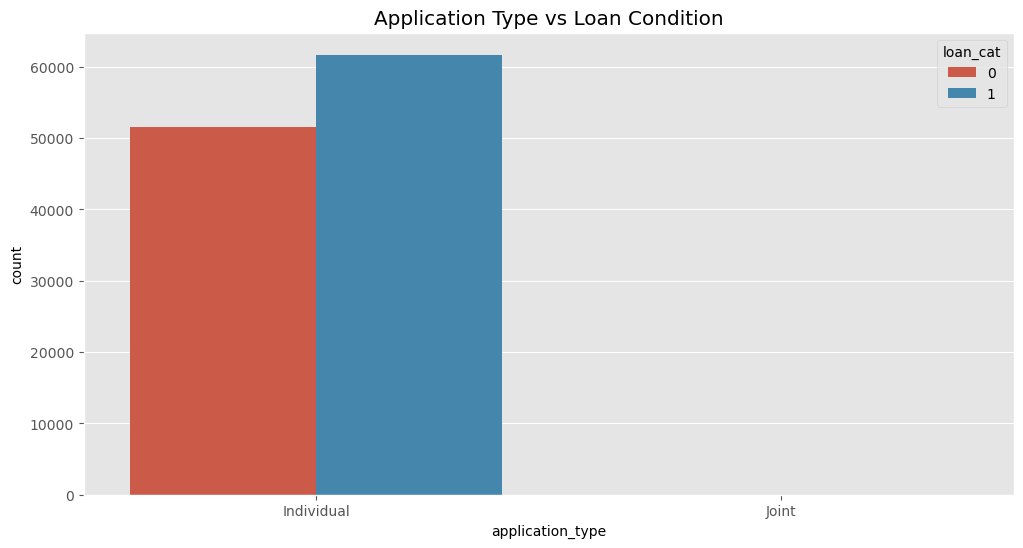

In [21]:
plt.figure(figsize=(12,6))
plt.title("Application Type vs Loan Condition")
sns.countplot(x='application_type',data=Train_Data, hue='loan_cat')

<Axes: title={'center': 'Purpose vs Loan Condition'}, xlabel='purpose', ylabel='count'>

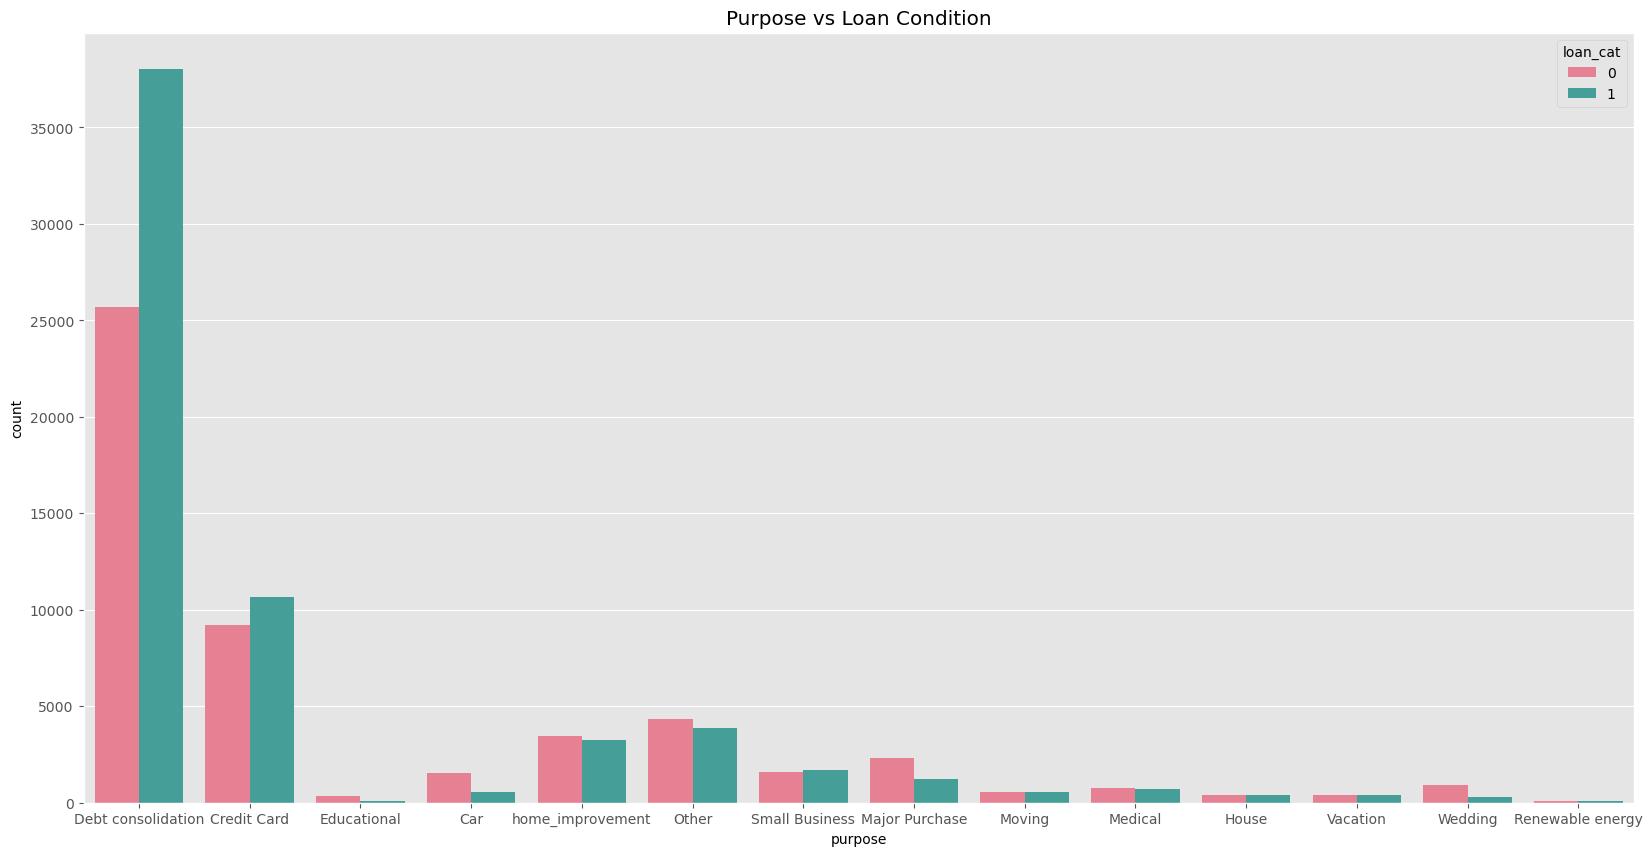

In [22]:
plt.figure(figsize=(20,10))
plt.title("Purpose vs Loan Condition")
sns.countplot(x='purpose',data=Train_Data, hue='loan_cat',palette="husl")

<Axes: title={'center': 'Interest Payments Type vs Loan Condition'}, xlabel='interest_payments', ylabel='count'>

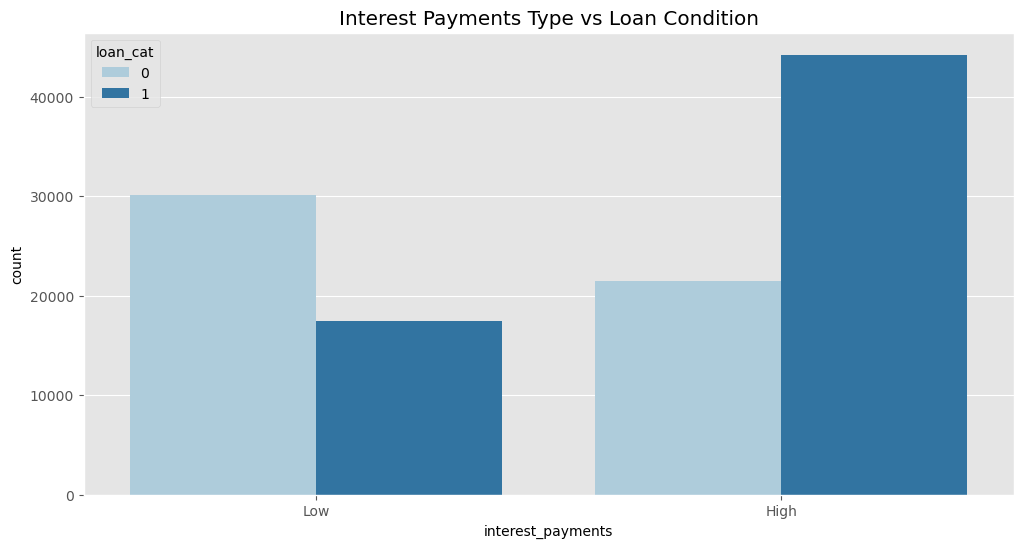

In [23]:
plt.figure(figsize=(12,6))
plt.title("Interest Payments Type vs Loan Condition")
sns.countplot(x='interest_payments',data=Train_Data, hue='loan_cat',palette="Paired")

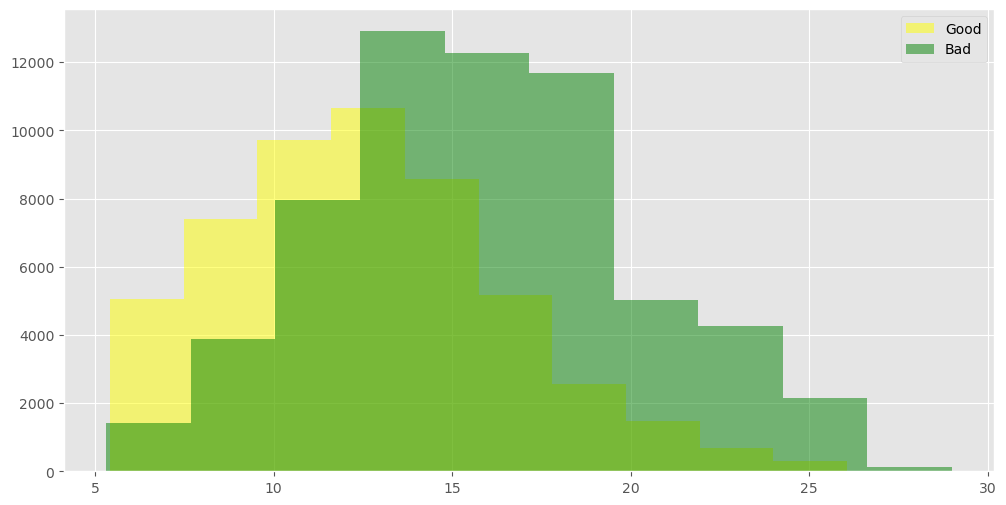

In [24]:
plt.figure(figsize=(12,6))
plt.hist(Train_Data[Train_Data['loan_cat']==0]['interest_rate'],color='yellow',alpha=0.5,label='Good')
plt.hist(Train_Data[Train_Data['loan_cat']==1]['interest_rate'],color='green',alpha=0.5,label='Bad')

plt.legend()

<Axes: xlabel='interest_rate'>

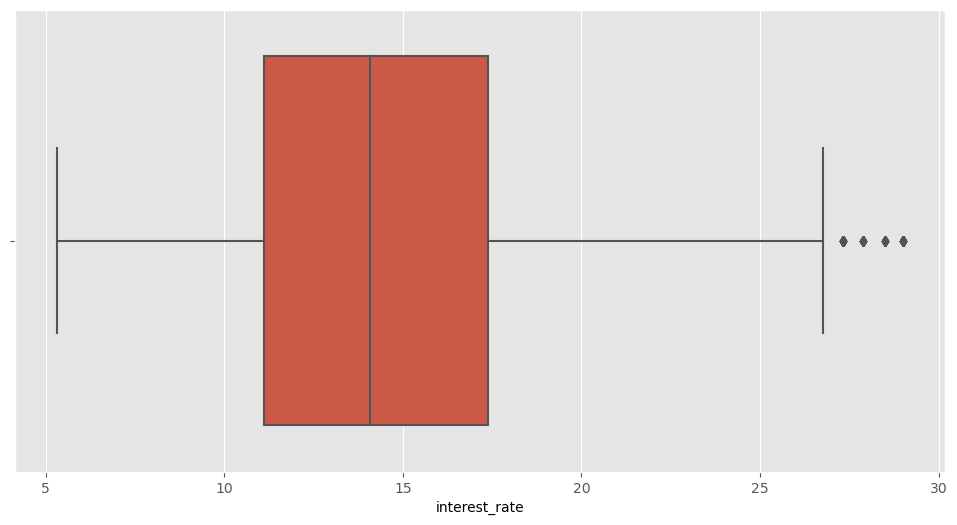

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Train_Data['interest_rate'])

In [26]:
#removing outliers
outliers = Train_Data[Train_Data['interest_rate'] > Train_Data['interest_rate'].quantile(.99)].index

In [27]:
Train_Data.loc[outliers,'interest_rate'] = Train_Data['interest_rate'].quantile(.99)

In [28]:
scaler = MinMaxScaler()
Train_Data['interest_rate'] = scaler.fit_transform(Train_Data['interest_rate'].values.reshape(-1,1))

<Axes: xlabel='loan_amount'>

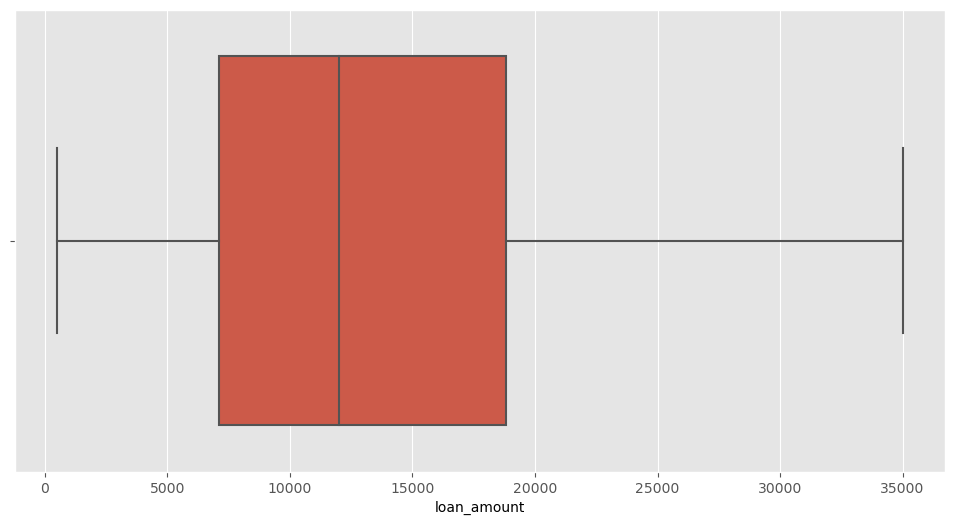

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Train_Data['loan_amount'])

<Axes: xlabel='dti'>

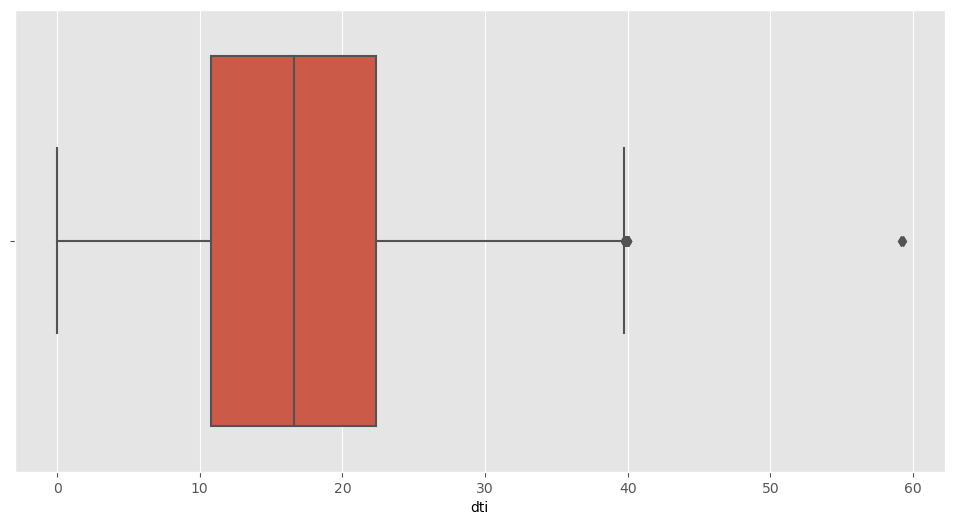

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Train_Data['dti'])

<Axes: xlabel='loan_amount'>

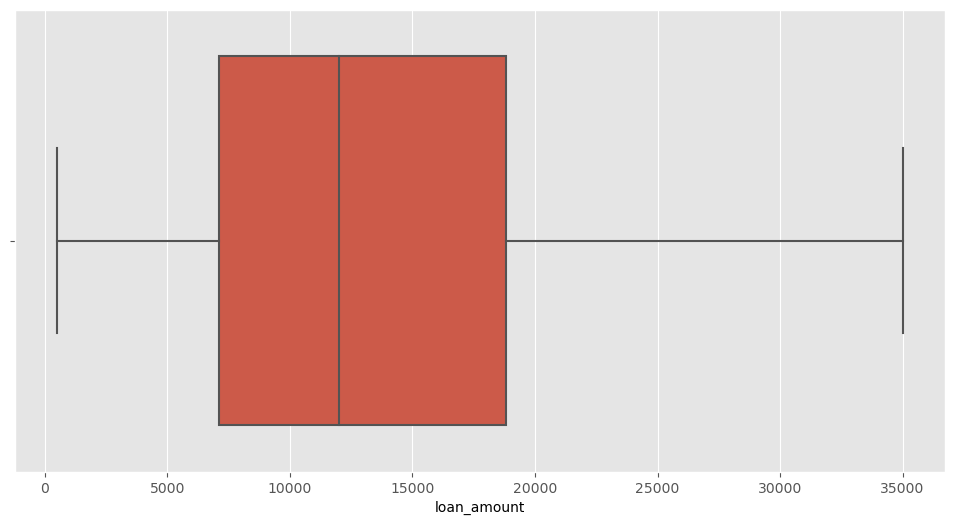

In [31]:
#removing outliers
outliers = Train_Data[Train_Data['dti'] > Train_Data['interest_rate'].quantile(.99)].index

Train_Data.loc[outliers,'dti'] = Train_Data['interest_rate'].quantile(.99)

scaler = MinMaxScaler()
Train_Data['dti'] = scaler.fit_transform(Train_Data['dti'].values.reshape(-1,1))

plt.figure(figsize=(12,6))
sns.boxplot(x=Train_Data['loan_amount'])

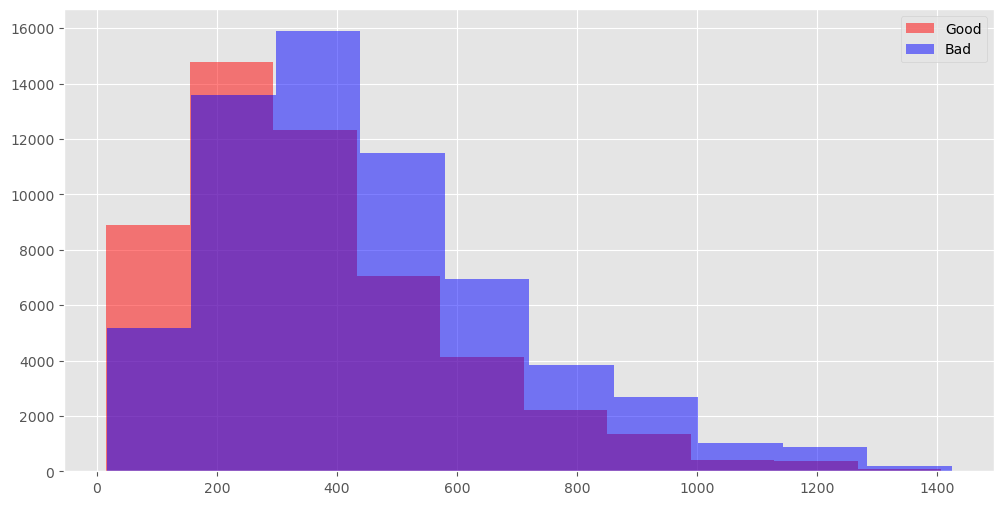

In [32]:
plt.figure(figsize=(12,6))
plt.hist(Train_Data[Train_Data['loan_cat']==0]['installment'],color='red',alpha=0.5,label='Good')
plt.hist(Train_Data[Train_Data['loan_cat']==1]['installment'],color='blue',alpha=0.5,label='Bad')

plt.legend()

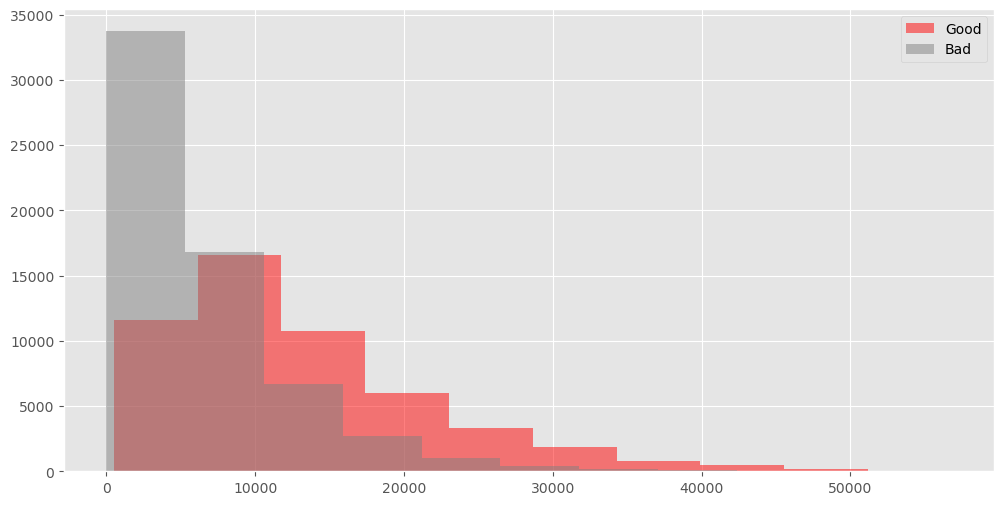

In [33]:
plt.figure(figsize=(12,6))
plt.hist(Train_Data[Train_Data['loan_cat']==0]['total_pymnt'],color='red',alpha=0.5,label='Good')
plt.hist(Train_Data[Train_Data['loan_cat']==1]['total_pymnt'],color='grey',alpha=0.5,label='Bad')

plt.legend()

## **Identify correlation between attributes after the initial preprocessing**

C:\Users\HP\AppData\Local\Temp\ipykernel_1532\3284243467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_Data.corr(), annot=True, cmap = 'cubehelix')


<Axes: >

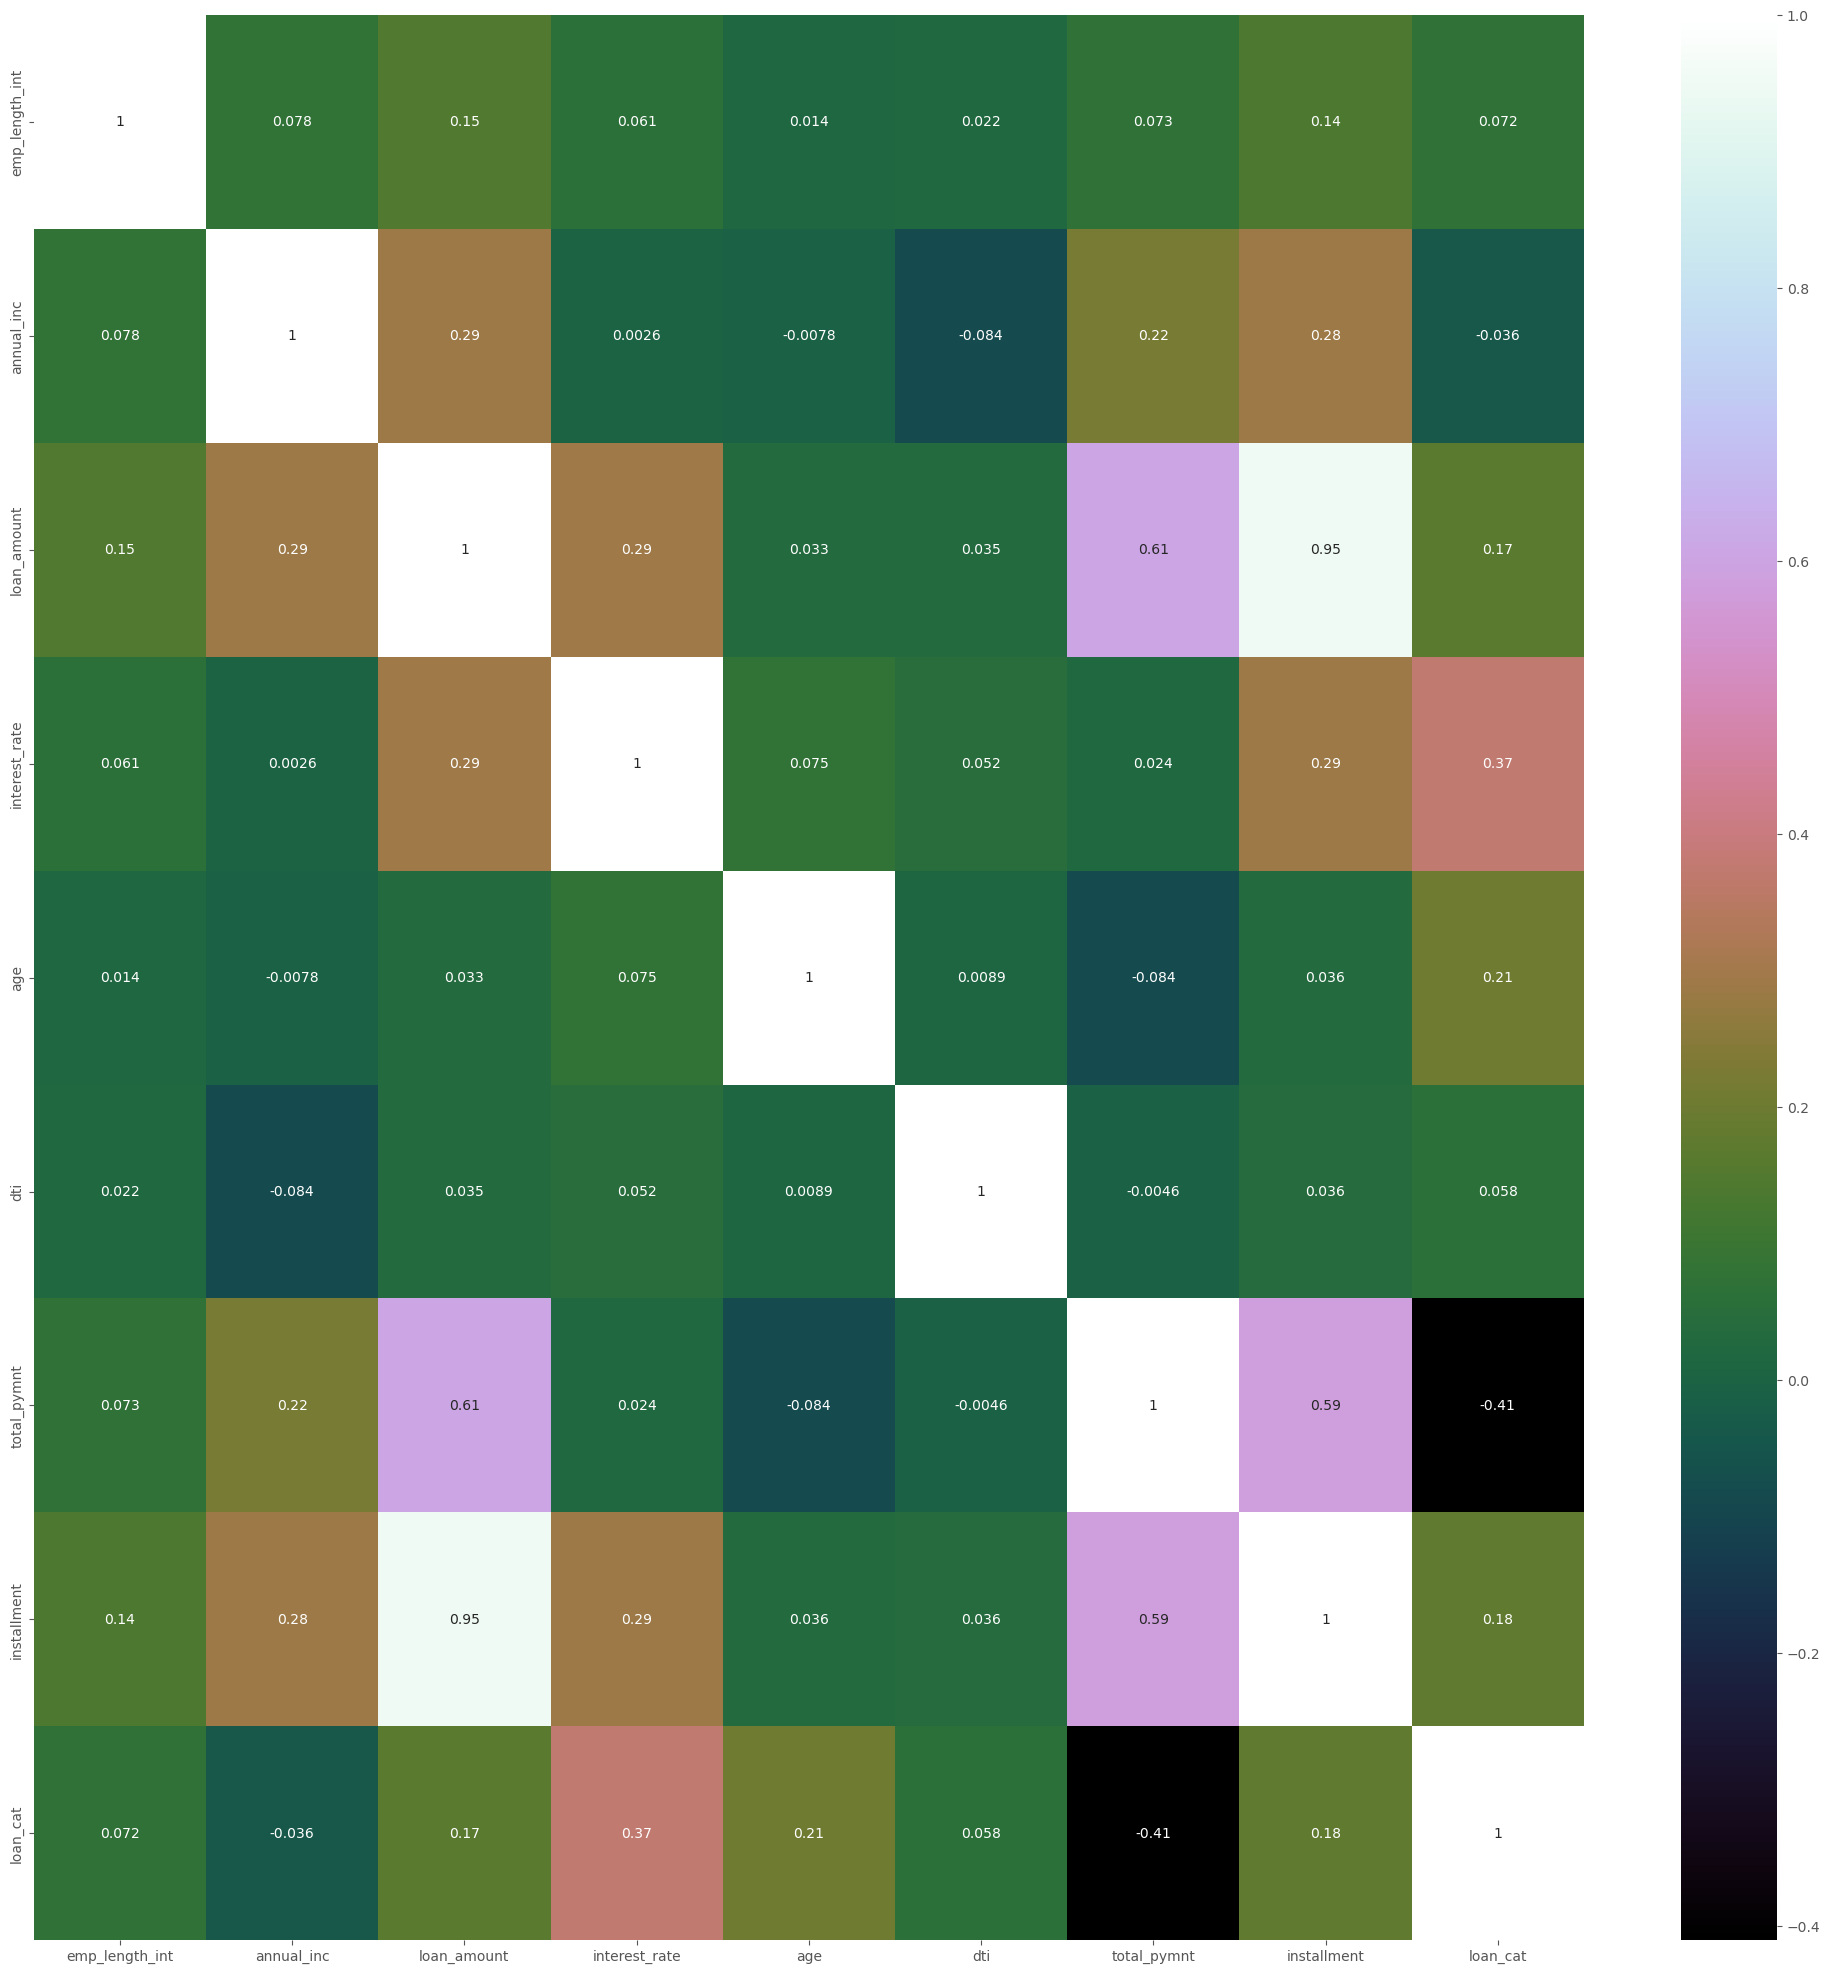

In [34]:
plt.figure(figsize=(25,25))
sns.heatmap(Train_Data.corr(), annot=True, cmap = 'cubehelix')

## **: Classify and separate the training set based on dependent (target) and independent variables (inputs).**

In [35]:
# specify input and output attributes
Input_cols = Train_Data.drop(columns=['loan_condition'], axis=1)
Target_cols= Train_Data['loan_condition']

# **Handling Categorical Data with OneHotEncoding**

In [36]:
#one hot encoding data
from sklearn.preprocessing import OneHotEncoder
 
numerical_cols_train = Input_cols.select_dtypes(include=np.number).columns.tolist()
categorical_cols_train = Input_cols.select_dtypes('object').columns.tolist()


In [37]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(Input_cols[categorical_cols_train])


c:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols_train))

In [39]:
Input_cols[encoded_cols] =encoder.transform(Input_cols[categorical_cols_train])
Train_Inputs=Input_cols[numerical_cols_train + encoded_cols]

In [40]:
Train_Inputs

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,loan_cat,home_ownership_Mortgage,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.5,85000,25000,0.324444,21,1.0,29324.32,829.10,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.5,30000,1000,0.531358,43,1.0,1207.76,35.20,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.5,65000,7000,0.266173,20,1.0,8215.45,228.22,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10.0,189500,7000,0.531358,55,1.0,1231.90,246.38,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,70000,25000,0.576296,18,1.0,6073.10,891.20,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,0.5,56000,15000,0.554568,58,1.0,0.00,531.44,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113276,7.0,101000,24000,0.576296,53,1.0,0.00,596.34,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113277,4.0,98000,2400,0.359012,27,1.0,0.00,80.40,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113278,3.0,61900,6000,0.498272,21,1.0,0.00,209.20,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
#cheking  data types of the coulmn
Train_Inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113280 entries, 0 to 113279
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   emp_length_int               113280 non-null  float64
 1   annual_inc                   113280 non-null  int64  
 2   loan_amount                  113280 non-null  int64  
 3   interest_rate                113280 non-null  float64
 4   age                          113280 non-null  int64  
 5   dti                          113280 non-null  float64
 6   total_pymnt                  113280 non-null  float64
 7   installment                  113280 non-null  float64
 8   loan_cat                     113280 non-null  int64  
 9   home_ownership_Mortgage      113280 non-null  float64
 10  home_ownership_None          113280 non-null  float64
 11  home_ownership_Other         113280 non-null  float64
 12  home_ownership_Own           113280 non-null  float64
 13 

In [42]:
Train_Inputs.describe()

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,loan_cat,home_ownership_Mortgage,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
count,113280.000000,1.132800e+05,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,...,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000
mean,5.626671,6.947177e+04,13579.070886,0.446361,47.578964,0.993835,9395.249278,408.286032,0.544703,0.458077,...,0.059075,0.579952,0.420048,0.138436,0.248773,0.254529,0.189124,0.108713,0.046628,0.013798
std,3.491567,6.438527e+04,8285.573758,0.222434,20.206136,0.066903,7928.634304,245.104487,0.498000,0.498242,...,0.235766,0.493568,0.493568,0.345358,0.432304,0.435598,0.391609,0.311280,0.210841,0.116651
min,0.500000,1.896000e+03,500.000000,0.000000,13.000000,0.000000,0.000000,15.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.200000e+04,7100.000000,0.286420,30.000000,1.000000,3584.020000,227.410000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000e+04,12000.000000,0.433086,47.000000,1.000000,7166.635000,354.450000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,8.300000e+04,18825.000000,0.596049,63.000000,1.000000,12862.712500,537.950000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.900060e+06,35000.000000,1.000000,90.000000,1.000000,56809.051630,1424.570000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Separating Independant and dependant Variable**

In [43]:
# specify input and output attributes
x = Train_Inputs.drop(columns=['loan_cat'], axis=1)
y = Train_Inputs['loan_cat']

In [44]:
x

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,home_ownership_Mortgage,home_ownership_None,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.5,85000,25000,0.324444,21,1.0,29324.32,829.10,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.5,30000,1000,0.531358,43,1.0,1207.76,35.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.5,65000,7000,0.266173,20,1.0,8215.45,228.22,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10.0,189500,7000,0.531358,55,1.0,1231.90,246.38,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,70000,25000,0.576296,18,1.0,6073.10,891.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,0.5,56000,15000,0.554568,58,1.0,0.00,531.44,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113276,7.0,101000,24000,0.576296,53,1.0,0.00,596.34,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113277,4.0,98000,2400,0.359012,27,1.0,0.00,80.40,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113278,3.0,61900,6000,0.498272,21,1.0,0.00,209.20,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
y

0         0
1         0
2         0
3         1
4         1
         ..
113275    1
113276    1
113277    1
113278    1
113279    1
Name: loan_cat, Length: 113280, dtype: int64

# **Splitting training and testing data set**

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [47]:
x_train.head()

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,home_ownership_Mortgage,home_ownership_None,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
9619,3.0,60000,7000,0.126420,48,1.0,7842.770000,218.97,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22060,10.0,107500,10000,0.115556,32,1.0,11218.070000,311.80,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,1.0,225000,3000,0.197531,64,1.0,3448.690000,95.85,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35655,2.0,44004,5000,0.176790,19,1.0,5713.859502,158.77,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
63024,10.0,60000,6000,0.734815,74,1.0,6037.200000,223.60,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
y_test.head()

103342    1
63701     1
65078     1
59211     1
110520    1
Name: loan_cat, dtype: int64

# **MODEL TRAINING**

# **1. SUPPORT VECTOR MACHINE**

---



In [49]:
#SVM
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_test, y_test)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [50]:
#Evaluating the Model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#getting the accuracy , reacall and precission of the model using test set 
AUC_SVM=roc_auc_score(y_pred,y_test)
acc_SVM=accuracy_score(y_test,y_pred)
recall_SVM=recall_score(y_test,y_pred)
precision_SVM=precision_score(y_test,y_pred)
f1score_SVM=f1_score(y_test,y_pred)

# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_SVM)

Accuracy :  87.76041666666666
Precision: 0.8960761779674931
Recall: 0.8786927473235129
F1-Score: 0.8872993294045926
ROC_AUC Score: 0.8760980469749629


In [51]:
#GETTING CLASSIFICATION REPORT
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10474
           1       0.88      0.90      0.89     12182

    accuracy                           0.88     22656
   macro avg       0.88      0.88      0.88     22656
weighted avg       0.88      0.88      0.88     22656



## **ROC Curve**

[[ 8967  1266]
 [ 1507 10916]]


<Axes: >

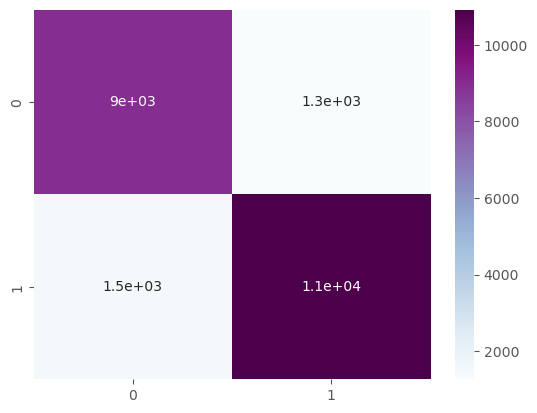

In [52]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **2.** **DECISION** **TREE** **CLASSIFIER**

---



In [53]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
#Training the model
DT_model.fit(x_train, y_train)

y_pred = DT_model.predict(x_test)
RF_probability = DT_model.predict_proba(x_test)[:,1]


#getting the accuracy , reacall and precission of the model using test set 
AUC_DT=roc_auc_score(y_pred,y_test)
acc_DT=accuracy_score(y_test,y_pred)
recall_DT=recall_score(y_test,y_pred)
precision_DT=precision_score(y_test,y_pred)
f1score_DT=f1_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_DT)

Accuracy :  93.81179378531074
Precision: 0.9437152749818826
Recall: 0.9434114143121629
F1-Score: 0.9435633201835602
ROC_AUC Score: 0.9375214061731725


In [54]:
#GETTING CLASSIFICATION REPORT
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10237
           1       0.94      0.94      0.94     12419

    accuracy                           0.94     22656
   macro avg       0.94      0.94      0.94     22656
weighted avg       0.94      0.94      0.94     22656



## **ROC** **Curve**

[[ 9534   699]
 [  703 11720]]


<Axes: >

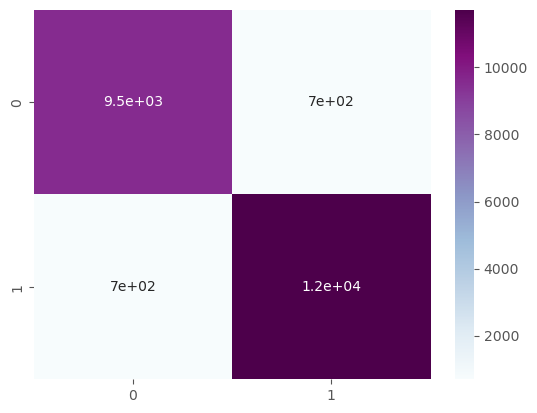

In [55]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# 3. **RANDOM** **FOREST** **CLASSIFIER**

---



In [56]:
from sklearn.ensemble import RandomForestClassifier
#Training the model
randomForest_Model = RandomForestClassifier()
randomForest_Model=randomForest_Model.fit(x_train, y_train)
y_pred = randomForest_Model.predict(x_test)
RF_probability = randomForest_Model.predict_proba(x_test)[:,1]


#getting the accuracy , reacall and precission of the model using test set 
AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  94.47828389830508
Precision: 0.9677608440797186
Recall: 0.9302905900346132
F1-Score: 0.9486558588138724
ROC_AUC Score: 0.943466010988898


In [57]:
#GETTING CLASSIFICATION REPORT
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10714
           1       0.93      0.97      0.95     11942

    accuracy                           0.94     22656
   macro avg       0.95      0.94      0.94     22656
weighted avg       0.95      0.94      0.94     22656



## **ROC** **Curve**

[[ 9848   385]
 [  866 11557]]


<Axes: >

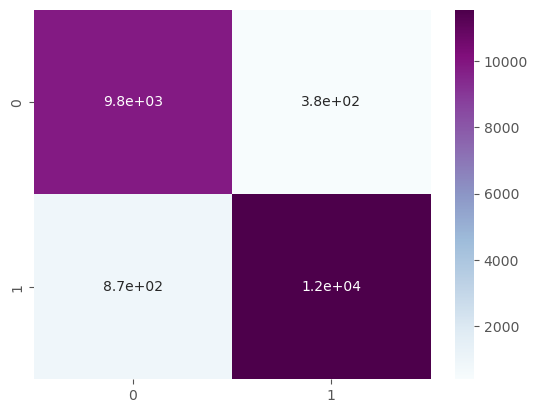

In [58]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# 4. **LOGISTIC** **REGRESSION**

---



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load data
# Assumes data is stored in variables X and y

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=130)

# Create logistic regression object with L1 regularization
logreg_model = LogisticRegression(penalty='l1', solver='liblinear')

# Train model on the training set
logreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(x_test)

# Get predicted probabilities for the positive class
logreg_probabilities = logreg_model.predict_proba(x_test)[:, 1]

# Compute performance metrics
acc_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1score_logreg = f1_score(y_test, y_pred)
AUC_logreg = roc_auc_score(y_test, logreg_probabilities)

# Print performance metrics
print("Accuracy: ", acc_logreg*100)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-Score:", f1score_logreg)
print("ROC-AUC Score:", AUC_logreg)


Accuracy:  89.12429378531074
Precision: 0.9065780839895013
Recall: 0.8929552431733722
F1-Score: 0.8997150997150998
ROC-AUC Score: 0.9542548937878881


In [60]:
#GETTING CLASSIFICATION REPORT
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     10464
           1       0.89      0.91      0.90     12192

    accuracy                           0.89     22656
   macro avg       0.89      0.89      0.89     22656
weighted avg       0.89      0.89      0.89     22656



## **ROC** **Curve**

[[ 9139  1139]
 [ 1325 11053]]


<Axes: >

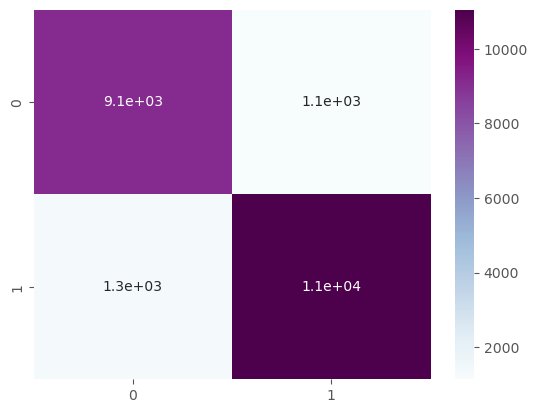

In [61]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

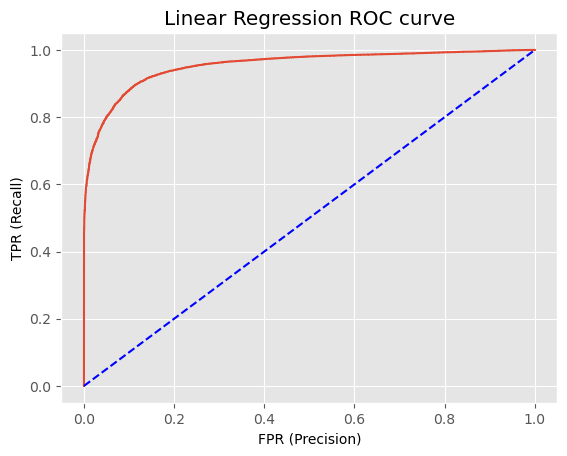

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, logreg_probabilities)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='blue')
plt.show()

# **COMPARISON** **AMONG** **MODELS**

---



In [63]:
ind=['Logistic regression','Randomforest','Decision Tree', 'svm']
data={"Accuracy":[acc_logreg,acc_rf,acc_DT,acc_SVM],"Recall":[recall_logreg,recall_rf,recall_DT,recall_SVM],"Precision":[precision_logreg,precision_rf,precision_DT,precision_SVM],
    'f1_score':[f1score_logreg,f1score_rf,f1score_DT,f1score_SVM],"ROC_AUC":[AUC_logreg,AUC_RF,AUC_DT,AUC_SVM]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.891243,0.892955,0.906578,0.899715,0.954255
Randomforest,0.944783,0.930291,0.967761,0.948656,0.943466
Decision Tree,0.938118,0.943411,0.943715,0.943563,0.937521
svm,0.877604,0.878693,0.896076,0.887299,0.876098


[4.01107588e-02 5.20922151e-02 9.34626339e-02 1.03292157e-01
 1.08588965e-01 2.38530998e-03 3.12094050e-01 1.05957809e-01
 6.29189725e-03 3.56845513e-05 3.54271027e-04 4.40287243e-03
 6.31416521e-03 1.15872190e-03 3.56953776e-03 3.08727865e-03
 5.99831050e-03 5.59392516e-03 2.62934295e-06 2.13428273e-06
 2.47098148e-03 5.87832159e-03 8.24283038e-03 8.05447434e-04
 1.10132907e-03 2.85071835e-03 1.66868550e-03 1.11132433e-03
 4.23665828e-03 3.74330737e-04 2.57993366e-03 1.10014444e-03
 2.01169755e-03 3.28053975e-03 2.76415734e-02 3.00232589e-02
 2.10967443e-02 8.45935885e-03 6.00369771e-03 5.70209673e-03
 4.47280452e-03 2.95586211e-03 1.13633478e-03]


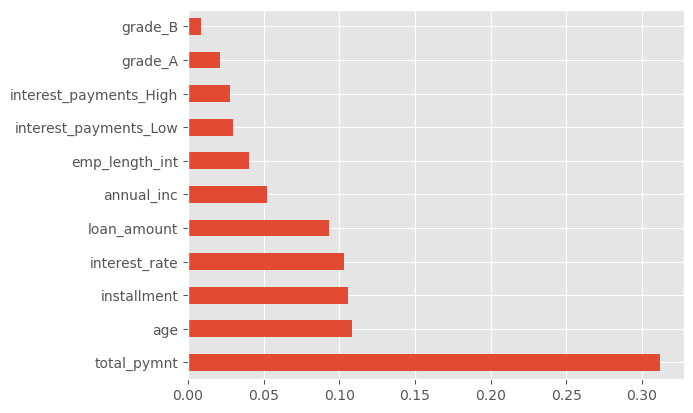

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
Model = ExtraTreesClassifier()
Model.fit(x,y)
#use inbuilt class feature_importances of tree based class
print(Model.feature_importances_) 

#plot of feature importances for best visualization
feat_importances = pd.Series(Model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [65]:
#So that choose Random Forest and the Support vector machine as the best algorithms